In [3]:
# Importação das bibliotecas essenciais para análise de dados
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns  # Para visualizações mais avançadas
import os


In [4]:

# Caminho correto considerando que o Jupyter está rodando em notebooks/
file_path = os.path.join("..", "dataset", "raw", "ObesityDataSet_raw_and_data_sinthetic.csv")

# Obter caminho absoluto corrigido
absolute_path = os.path.abspath(file_path)
print("Caminho absoluto corrigido:", absolute_path)

# Verificar se o arquivo existe
if os.path.exists(absolute_path):
    print("✅ Arquivo encontrado! Caminho correto.")
else:
    print("❌ Arquivo NÃO encontrado! Verifique o caminho.")



Caminho absoluto corrigido: c:\Users\Matheus\dataMiningObesity\dataset\raw\ObesityDataSet_raw_and_data_sinthetic.csv
✅ Arquivo encontrado! Caminho correto.


In [9]:
 # Leitura do CSV em um DataFrame
df = pd.read_csv(file_path) 
print(df) 

            Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with_overweight       FAF       TU

In [10]:
# Exibir as 5 primeiras linhas para visualizar a estrutura dos dados
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
# Exibir informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
# Contar o total de valores nulos no DataFrame
print(df.isnull().sum().sum())

# Contar valores ausentes em cada coluna
missing_values = df.isnull().sum()

# Exibir colunas que possuem valores ausentes
missing_values[missing_values > 0]
print(missing_values)

# Exibir as linhas com valores nulos
df[df.isnull().any(axis=1)]


Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad


In [ ]:
# Verificar valores únicos por coluna
print("\n🔍 Quantidade de valores únicos por coluna:")
print(df.nunique())


🔍 Quantidade de valores únicos por coluna:
Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [20]:
# Dimensão do dataset
print("\n📏 Dimensão do dataset (linhas, colunas):", df.shape)


📏 Dimensão do dataset (linhas, colunas): (2111, 17)


In [18]:
# Estatísticas básicas das variáveis numéricas -->> Isso ajuda a entender a distribuição e possíveis problemas nos dados.
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
# Identificar registros duplicados
print("\n🔍 Número de registros duplicados:", df.duplicated().sum())


🔍 Número de registros duplicados: 24


In [10]:
# os tipos de cada coluna:
print(df.dtypes)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [11]:
# Lista das colunas categóricas que devem ser convertidas
categorical_cols = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

# Converter para string
df[categorical_cols] = df[categorical_cols].astype(str)

# Verificar novamente os tipos de dados
print(df.dtypes)


Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [14]:
# Lista das colunas numéricas
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

# Converter para float
df[numerical_cols] = df[numerical_cols].astype(float)

# Verificar novamente os tipos de dados
print(df.dtypes)


Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [15]:
# Contar valores únicos por categoria
for col in categorical_cols:
    print(f"{col}: \n{df[col].value_counts()}\n")


Gender: 
Gender
Male      1068
Female    1043
Name: count, dtype: int64

CALC: 
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

FAVC: 
FAVC
yes    1866
no      245
Name: count, dtype: int64

SCC: 
SCC
no     2015
yes      96
Name: count, dtype: int64

SMOKE: 
SMOKE
no     2067
yes      44
Name: count, dtype: int64

family_history_with_overweight: 
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

CAEC: 
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

MTRANS: 
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad: 
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_W

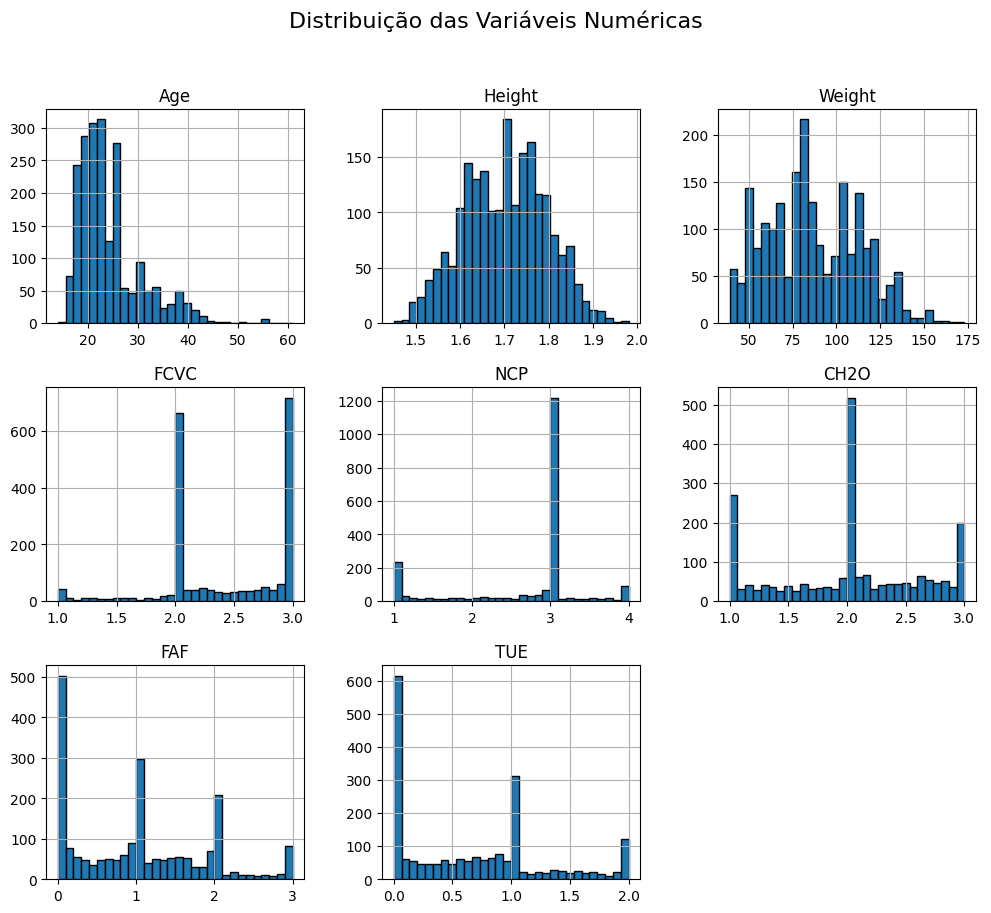

In [4]:
# Distribuição das Variáveis Numéricas
 
import matplotlib.pyplot as plt

# Criar histogramas para todas as variáveis numéricas
df.hist(figsize=(12, 10), bins=30, edgecolor='black')

# Adicionar um título geral
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)

# Mostrar os gráficos
plt.show()


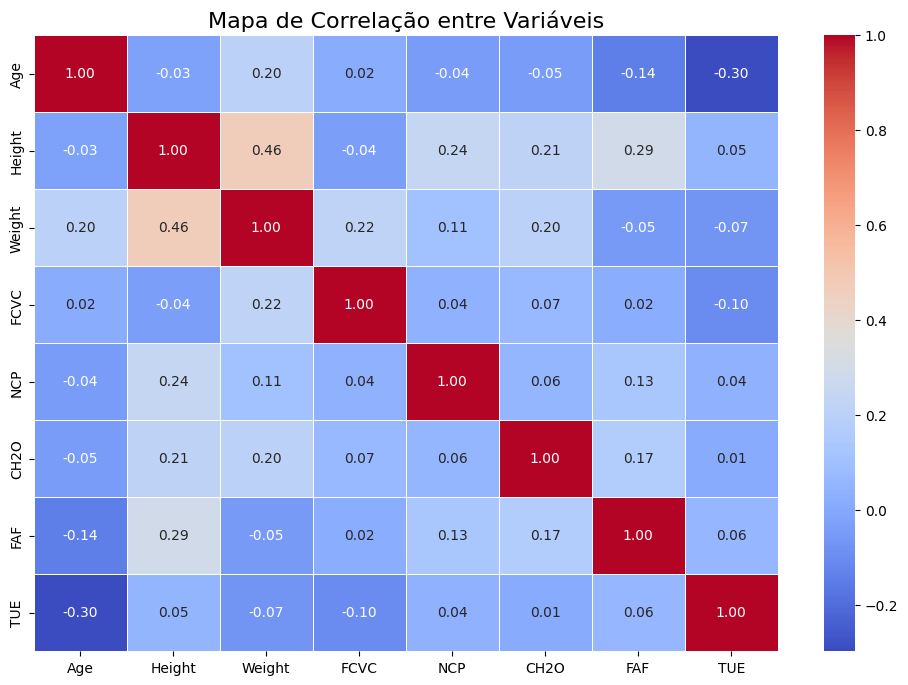

In [5]:
# Correlação entre Variáveis (Heatmap)
import seaborn as sns
import numpy as np

# Calcular a matriz de correlação
corr_matrix = df.corr(numeric_only=True)

# Criar um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Adicionar um título
plt.title("Mapa de Correlação entre Variáveis", fontsize=16)

# Mostrar o gráfico
plt.show()


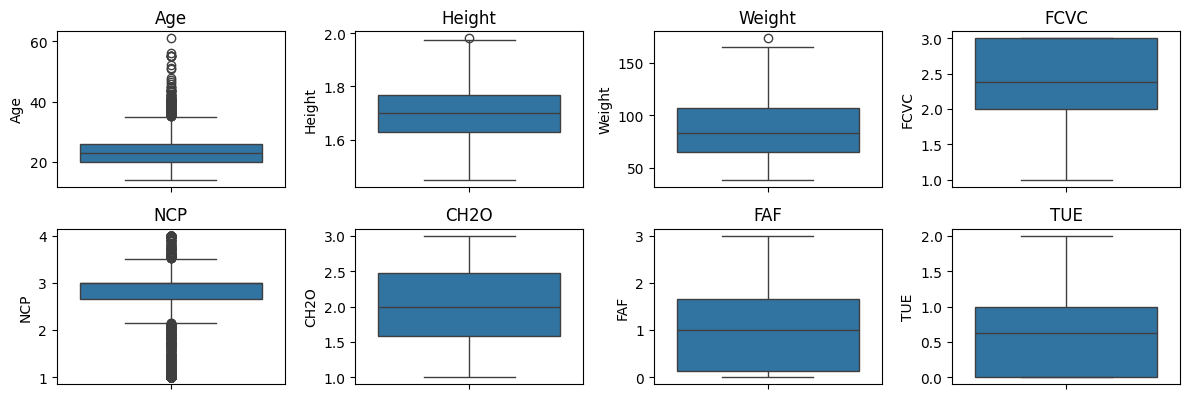

In [6]:
# Boxplots para Detecção de Outliers
# Criar boxplots para as variáveis numéricas
plt.figure(figsize=(12, 8))

# Percorrer todas as variáveis numéricas
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)  # Criar subplots organizados
    sns.boxplot(y=df[col])
    plt.title(col)

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()



C:\Users\Matheus\AppData\Local\Temp\ipykernel_15476\2496865277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["NObeyesdad"], palette="Set2", order=df["NObeyesdad"].value_counts().index)


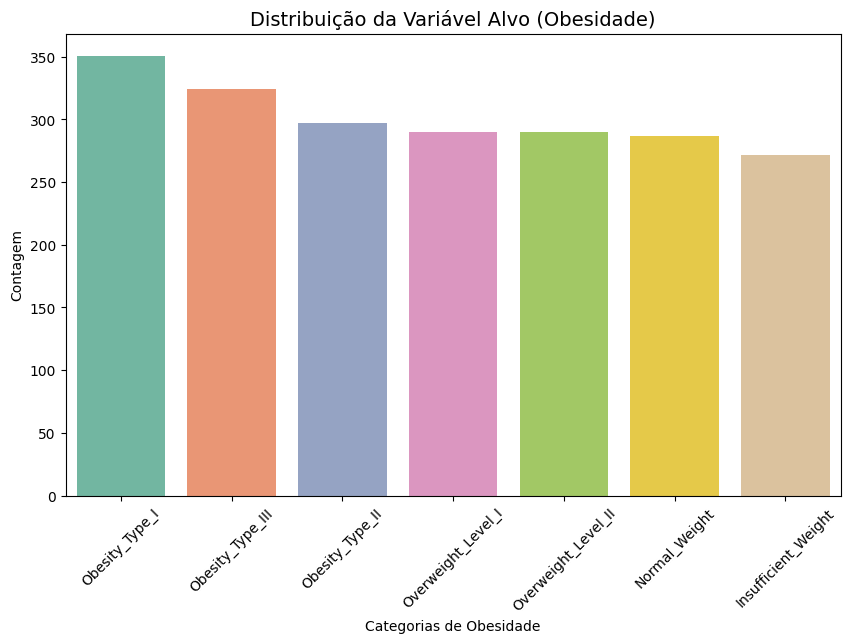

In [7]:
# Visualizar a distribuição das categorias de obesidade (NObeyesdad) para entender o equilíbrio das classes.

plt.figure(figsize=(10, 6))
sns.countplot(x=df["NObeyesdad"], palette="Set2", order=df["NObeyesdad"].value_counts().index)

# Melhorar a legibilidade
plt.xticks(rotation=45)
plt.title("Distribuição da Variável Alvo (Obesidade)", fontsize=14)
plt.xlabel("Categorias de Obesidade")
plt.ylabel("Contagem")
plt.show()




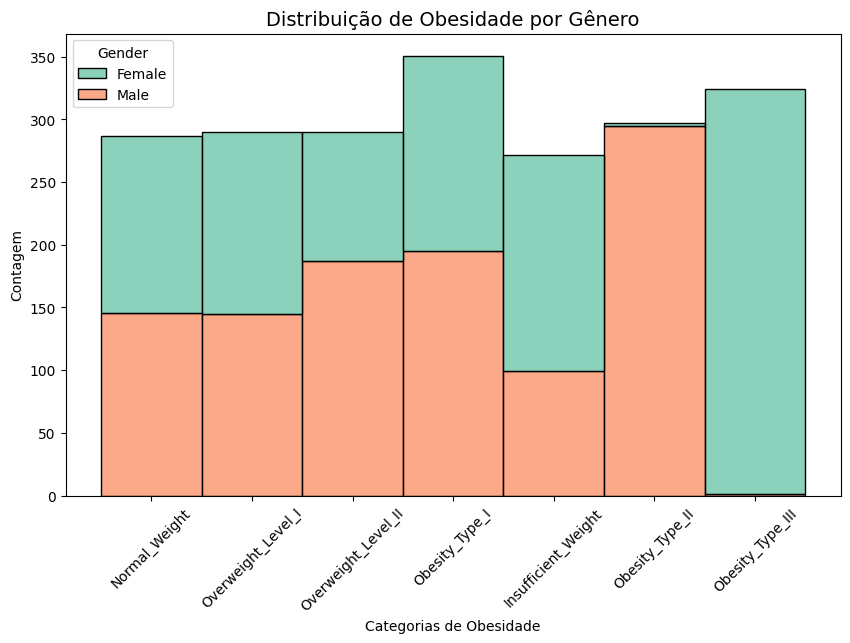

In [8]:
# Relação entre Gênero e Obesidade (Stacked Barplot)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="NObeyesdad", hue="Gender", multiple="stack", palette="Set2")

plt.xticks(rotation=45)
plt.title("Distribuição de Obesidade por Gênero", fontsize=14)
plt.xlabel("Categorias de Obesidade")
plt.ylabel("Contagem")
plt.show()


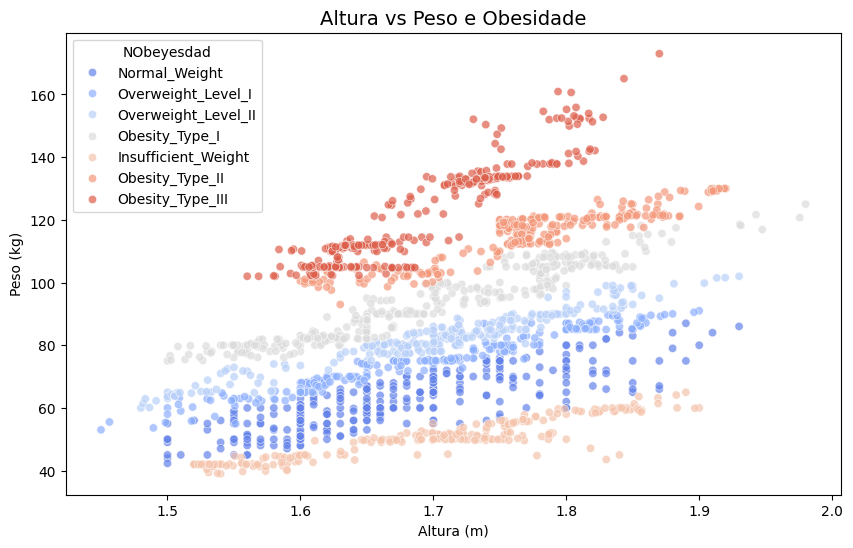

In [9]:
# Relação entre IMC (Índice de Massa Corporal) e Obesidade (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Height"], y=df["Weight"], hue=df["NObeyesdad"], palette="coolwarm", alpha=0.7)

plt.title("Altura vs Peso e Obesidade", fontsize=14)
plt.xlabel("Altura (m)")
plt.ylabel("Peso (kg)")
plt.show()
